## ライブラリ読み込み

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# from matplotlib import rcParams
# plt.rcParams["font.family"] = "MS Gothic"
import seaborn as sns

# !pip install japanize-matplotlib
import japanize_matplotlib

In [2]:
# import glob
#47都道府県分csvファイルがあるので、全て結合して１つのファイルとする
# csv_files = glob.glob('train/*.csv')

In [3]:
# #csvファイルの中身を追加していくリストを用意
# data_list = []

# #読み込むファイルのリストを走査
# for file in csv_files:
#     data_list.append(pd.read_csv(file))

# #リストを全て行方向に結合
# #axis=1:行方向に結合, sort
# df = pd.concat(data_list, axis=0, sort=True)

# df.to_csv("train/train_all_pre.csv",index=False)

In [477]:
train = pd.read_csv('train/train_all_pre.csv')
test = pd.read_csv('test.csv')

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## データの読み込み

In [478]:
#結合 -> 分割時の目印にする
train['Train_flg'] = True
test['Train_flg'] = False

In [479]:
#trainとtestを合わせる
data = pd.concat([train, test])
data = data.reset_index() 

## 内容確認と前処理

In [287]:
train.shape

(3313995, 28)

In [542]:
data[data['Train_flg'] == True].shape

(3313995, 30)

In [47]:
test.shape

(23204, 30)

In [541]:
data[data['Train_flg'] == False].shape

(23204, 30)

In [225]:
data.shape

(3337199, 30)

In [637]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337199 entries, 0 to 3337198
Data columns (total 30 columns):
 #   Column        Dtype  
---  ------        -----  
 0   index         int64  
 1   ID            int64  
 2   今後の利用目的       object 
 3   前面道路：幅員（ｍ）    float64
 4   前面道路：方位       float64
 5   前面道路：種類       float64
 6   取引の事情等        object 
 7   取引価格（総額）_log  float64
 8   取引時点          object 
 9   土地の形状         float64
 10  地区名           object 
 11  地域            float64
 12  容積率（％）        float64
 13  市区町村コード       int64  
 14  市区町村名         object 
 15  延床面積（㎡）       float64
 16  建ぺい率（％）       float64
 17  建物の構造         object 
 18  建築年           object 
 19  改装            object 
 20  最寄駅：名称        object 
 21  最寄駅：距離（分）     object 
 22  用途            object 
 23  種類            object 
 24  都市計画          object 
 25  都道府県名         object 
 26  間取り           object 
 27  間口            float64
 28  面積（㎡）         object 
 29  Train_flg     bool   
dtypes: bool(1), float6

In [558]:
train['取引価格（総額）_log'].mean()

7.220486390797865

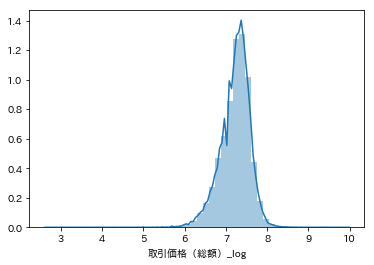

In [497]:
sns.distplot(train['取引価格（総額）_log'])

In [538]:
data_na = (data.isnull().sum() / len(data)) * 100
#data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
data_na = data_na.sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data['Missing Ratio'].sort_values(ascending=False)

土地の形状           100.000000
間口              100.000000
前面道路：種類         100.000000
前面道路：方位         100.000000
前面道路：幅員（ｍ）      100.000000
地域              100.000000
延床面積（㎡）         100.000000
取引の事情等           97.229143
今後の利用目的          54.487041
改装                9.094453
用途                8.283983
間取り               3.474141
容積率（％）            3.466560
建ぺい率（％）           3.466560
最寄駅：距離（分）         3.457780
建築年               2.887841
都市計画              2.855718
建物の構造             2.379211
取引価格（総額）_log      0.695314
最寄駅：名称            0.397429
地区名               0.098646
都道府県名             0.000000
ID                0.000000
Train_flg         0.000000
市区町村名             0.000000
取引時点              0.000000
市区町村コード           0.000000
面積（㎡）             0.000000
種類                0.000000
index             0.000000
Name: Missing Ratio, dtype: float64

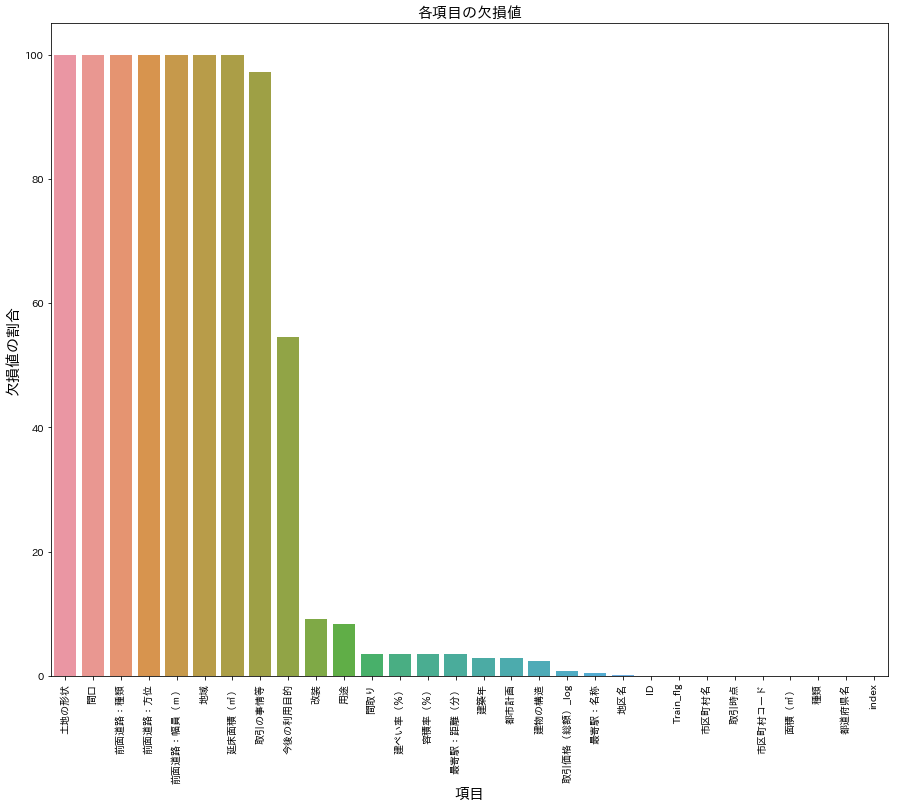

In [539]:
# plt.rcParams['font.family'] = 'IPAexGothic'
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('項目', fontsize=15)
plt.ylabel('欠損値の割合', fontsize=15)
plt.title('各項目の欠損値', fontsize=15)

In [480]:
data = data.drop(['土地の形状', '間口', '前面道路：種類', '前面道路：方位', '前面道路：幅員（ｍ）', \
                  '地域', '延床面積（㎡）', '取引の事情等', '今後の利用目的'], axis=1)

## 改装

In [93]:
data['改装'].value_counts()

未改装    2187377
改装済     846322
Name: 改装, dtype: int64

In [163]:
train.groupby('改装').mean()['取引価格（総額）_log'].sort_values(ascending=False)

改装
未改装    7.223064
改装済    7.222403
Name: 取引価格（総額）_log, dtype: float64

In [481]:
#未改装：０　　改装済：１　
data['改装'][(data['改装'] == '未改装') | (data['改装'].isnull() == True)] = 0
data['改装'][data['改装'] == '改装済'] = 1

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [482]:
data['改装'] = data['改装'].astype(int)

In [90]:
data['改装'].value_counts()

0    2490877
1     846322
Name: 改装, dtype: int64

## 取引時点を加工

In [483]:
data['取引時点_年'] = data['取引時点'].str[:4]
data['取引時点_四半期'] = data['取引時点'].str[5:]

def change_date(取引時点_四半期):
    if 取引時点_四半期 == '第１四半期':
        return '0331'
    elif 取引時点_四半期 == '第２四半期':
        return '0630'
    elif 取引時点_四半期 == '第３四半期':                          
        return '0930'
    elif 取引時点_四半期 == '第４四半期':
        return '1231'
    else:
        return ''

In [484]:
data['取引時点_2'] = data['取引時点_四半期'].apply(change_date)

In [485]:
data['取引年月'] = data['取引時点_年'] + data['取引時点_2']

In [65]:
data['取引年月'].unique()

array(['20060930', '20190331', '20121231', '20110630', '20100930',
       '20100630', '20160331', '20161231', '20090930', '20170930',
       '20200331', '20140630', '20160630', '20180331', '20130930',
       '20141231', '20130331', '20110930', '20171231', '20101231',
       '20151231', '20060630', '20090630', '20131231', '20191231',
       '20180930', '20120331', '20090331', '20111231', '20120630',
       '20181231', '20200630', '20140331', '20110331', '20140930',
       '20150930', '20080930', '20070331', '20100331', '20130630',
       '20170331', '20170630', '20091231', '20071231', '20190930',
       '20081231', '20061231', '20190630', '20120930', '20180630',
       '20160930', '20150331', '20070930', '20080331', '20080630',
       '20070630', '20150630', '20060331', '20051231', '20050930',
       '20201231', '20200930'], dtype=object)

In [486]:
data['取引年月_西暦'] = data['取引年月'].str[0:4]
data['取引年月_西暦'] = data['取引年月_西暦'].astype(int) 

In [487]:
data['取引年月'] = data['取引年月'].astype(int)

In [162]:
data['取引年月'].value_counts()

20200331    73460
20140331    67805
20170331    66240
20150331    66185
20130331    66165
            ...  
20060331    21610
20051231    18250
20050930    17675
20200930    13450
20201231     9754
Name: 取引年月, Length: 62, dtype: int64

## 建築年を加工

In [632]:
data['建築年'].isnull().sum()

96373

In [488]:
data['和暦開始'] = data['建築年'].str[:2]

In [282]:
data['和暦開始'].unique()

array(['平成', '昭和', nan, '戦前', '令和'], dtype=object)

In [489]:
#戦前、nanは1930とする
def era_convert(和暦開始):
    if 和暦開始 == '昭和':
        return 1925
    elif 和暦開始 == '平成':
        return 1988
    elif 和暦開始 == '令和':
        return 2018
    else:
        return 1930

In [490]:
data['和暦開始年'] = data['和暦開始'].apply(era_convert)

In [491]:
data['和暦_年'] = data['建築年'].str[2:4]

In [492]:
data['和暦_年'] = data['和暦_年'].str.replace('年', '')

In [166]:
data['和暦_年'].unique()

array(['3', '58', '13', '64', '12', '62', '8', '27', '20', '59', '63',
       nan, '10', '60', '50', '2', '11', '54', '16', '49', '61', '6', '7',
       '18', '17', '9', '22', '5', '24', '25', '15', '21', '30', '4',
       '14', '26', '19', '29', '31', '55', '46', '57', '56', '23', '51',
       '47', '48', '52', '53', '43', '40', '28', '44', '', '36', '45',
       '41', '42', '39', '37', '32', '33', '38', '34', '35'], dtype=object)

In [493]:
data['和暦_年'][(data['和暦_年'] == '') | (data['和暦_年'].isnull())] = '0'

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [288]:
data['和暦開始年'].unique()

array([1988, 1925, 1930, 2018])

In [168]:
data['和暦開始年'].value_counts()

1988    2248653
1925     987808
1930      99187
2018       1551
Name: 和暦開始年, dtype: int64

In [494]:
data['和暦開始年'] = data['和暦開始年'].astype(int)
data['和暦_年'] = data['和暦_年'].astype(int)

In [495]:
data['建築年'] = data['和暦開始年'] + data['和暦_年']

In [331]:
data[['取引年月_西暦', '建築年']].head()

,取引年月_西暦,建築年
0,2006,1991
1,2019,1983
2,2012,2001
3,2011,1989
4,2010,2000


In [496]:
data['築年数'] = data['取引年月_西暦'] - data['建築年']

## 地区名

In [543]:
train.groupby('地区名').mean()['取引価格（総額）_log'].sort_values(ascending=False)

地区名
麻布永坂町      8.561378
元麻布        8.163697
麻布狸穴町      8.058572
市谷船河原町     8.006290
鉢山町        8.002973
             ...   
厳美町        5.659125
横井上        5.600689
三ヶ日町下尾奈    5.367497
大字丹治       4.849485
東立科        4.556217
Name: 取引価格（総額）_log, Length: 12090, dtype: float64

In [17]:
data['地区名'].mode()

0    本町
dtype: object

In [24]:
data['都道府県名'][data['地区名'] == '本町'].unique()

array(['福岡県', '熊本県', '愛知県', '静岡県', '茨城県', '長野県', '広島県', '山口県', '岐阜県',
       '栃木県', '鳥取県', '和歌山県', '三重県', '京都府', '大阪府', '岡山県', '富山県', '青森県',
       '石川県', '北海道', '新潟県', '神奈川県', '兵庫県', '宮城県', '群馬県', '愛媛県', '高知県',
       '埼玉県', '東京都', '福島県', '山形県', '千葉県'], dtype=object)

In [497]:
data['地区名'][data['地区名'].isnull() == True] = data['地区名'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [498]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded = le.fit_transform(data['地区名'].values)
decoded = le.inverse_transform(encoded)
data['地区名'] = encoded

## 最寄駅：名称

In [218]:
train.groupby('最寄駅：名称').mean()['取引価格（総額）_log'].sort_values(ascending=False)

最寄駅：名称
日比谷       7.969297
辛島町       7.965983
永田町       7.871649
新豊洲       7.820463
神谷町       7.819061
            ...   
下泉        6.039591
仁愛女子高校    6.000000
尾奈        5.414313
三ケ日       5.166667
吉野神宮      4.849485
Name: 取引価格（総額）_log, Length: 3846, dtype: float64

In [222]:
len(data['最寄駅：名称'][data['最寄駅：名称'].isnull() == True]) 

13263

In [499]:
data['最寄駅：名称'][data['最寄駅：名称'].isnull() == True] = data['最寄駅：名称'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [500]:
le = LabelEncoder()
encoded = le.fit_transform(data['最寄駅：名称'].values)
decoded = le.inverse_transform(encoded)
data['最寄駅：名称'] = encoded

## 最寄駅：距離（分）を加工

In [428]:
train['最寄駅：距離（分）'].isnull().sum()

115380

In [427]:
test['最寄駅：距離（分）'].isnull().sum()

13

In [344]:
data['最寄駅：距離（分）'].unique()

array([nan, '25', '30分?60分', '21', '13', '5', '2', '11', '7', '10', '6',
       '14', '3', '8', '15', '4', '9', '16', '18', '1H?1H30', '23', '1',
       '20', '19', '26', '12', '28', '24', '29', '0', '27', '17',
       '1H30?2H', '22', '2H?'], dtype=object)

In [8]:
train.groupby('最寄駅：距離（分）').mean()['取引価格（総額）_log'].sort_values(ascending=False)
# mean.plot.bar(title='最寄駅：距離（分）の頻度')

最寄駅：距離（分）
1          7.319250
0          7.309720
2          7.290342
3          7.287793
4          7.276354
6          7.269745
5          7.266076
7          7.263506
8          7.250800
10         7.250393
9          7.248901
11         7.234368
12         7.220599
13         7.206391
14         7.190744
15         7.189879
17         7.178023
16         7.160166
18         7.140583
19         7.112215
20         7.093304
21         7.079635
23         7.079633
24         7.072694
22         7.067335
26         7.062790
28         7.059977
25         7.051012
29         7.038829
30分?60分    7.021592
27         6.997248
1H?1H30    6.984857
1H30?2H    6.856076
2H?        6.693521
Name: 取引価格（総額）_log, dtype: float64

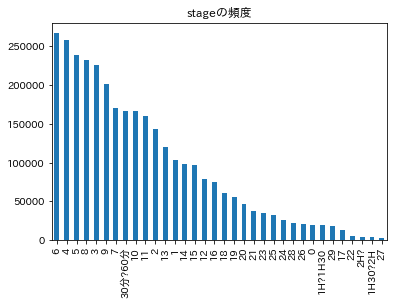

In [451]:
counts = data['最寄駅：距離（分）'].value_counts()
counts.plot.bar(title='最寄駅：距離（分）の頻度')

In [501]:
#文言から推察
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '30分?60分')] = '30'
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '1H?1H30')] = '60'
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '1H30?2H')] = '90'
data['最寄駅：距離（分）'][(data['最寄駅：距離（分）'] == '2H?')] = '120'

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [190]:
data['最寄駅：距離（分）'].value_counts()

6      267079
4      257406
5      238878
8      232628
3      225912
9      201459
7      170023
30     166569
10     165876
11     160562
2      142633
13     119520
1      103507
14      98201
15      97069
12      79310
16      74980
18      60995
19      54978
20      46525
21      37337
23      34745
25      32219
24      25645
28      21456
26      20824
0       19416
60      18851
29      18702
17      12939
22       5540
120      4348
90       3571
27       2103
Name: 最寄駅：距離（分）, dtype: int64

In [14]:
train['最寄駅：距離（分）'][train['最寄駅：距離（分）'].isnull() == True].count

<bound method Series.count of 0          NaN
5          NaN
30         NaN
33         NaN
41         NaN
          ... 
3313857    NaN
3313858    NaN
3313869    NaN
3313976    NaN
3313982    NaN
Name: 最寄駅：距離（分）, Length: 115380, dtype: object>

In [16]:
train[['最寄駅：距離（分）', '取引価格（総額）_log']][train['最寄駅：距離（分）'].isnull() == True]

,最寄駅：距離（分）,取引価格（総額）_log
0,NaN,6.740363
5,NaN,6.857332
30,NaN,7.146128
33,NaN,7.491362
41,NaN,6.505150
...,...,...
3313857,NaN,7.462398
3313858,NaN,7.301030
3313869,NaN,7.176091
3313976,NaN,6.748188


In [502]:
#欠損値に最頻値を代入
data['最寄駅：距離（分）'][data['最寄駅：距離（分）'].isnull() == True] = data['最寄駅：距離（分）'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
data['最寄駅：距離（分）'][data['最寄駅：距離（分）'].isnull() == True] 

Series([], Name: 最寄駅：距離（分）, dtype: object)

In [503]:
data['最寄駅：距離（分）'] = data['最寄駅：距離（分）'].astype(int)

## 容積率

In [108]:
train.groupby('容積率（％）').mean()['取引価格（総額）_log'].sort_values(ascending=False)

容積率（％）
1200.0    7.493097
1100.0    7.426976
700.0     7.363329
1300.0    7.349885
1000.0    7.318784
500.0     7.317013
600.0     7.306944
300.0     7.294909
80.0      7.278622
150.0     7.272627
100.0     7.255146
400.0     7.224427
800.0     7.211193
60.0      7.204020
50.0      7.182735
200.0     7.167344
900.0     7.117105
Name: 取引価格（総額）_log, dtype: float64

In [81]:
data['容積率（％）'].value_counts()

200.0     1533153
400.0      544111
300.0      446195
500.0      214137
600.0      201584
150.0      118058
100.0       50428
700.0       43646
800.0       35716
80.0        30391
1000.0       1856
60.0         1588
900.0         395
50.0          145
1200.0         55
1100.0         30
1300.0         25
Name: 容積率（％）, dtype: int64

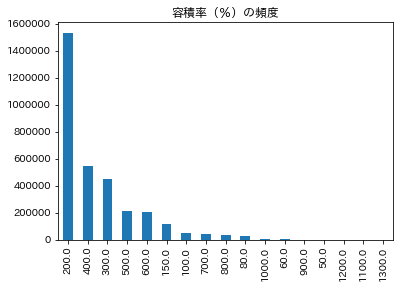

In [452]:
counts = data['容積率（％）'].value_counts()
counts.plot.bar(title='容積率（％）の頻度')

In [504]:
#欠損値に最頻値を代入
data['容積率（％）'][data['容積率（％）'].isnull() == True] = data['容積率（％）'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [505]:
data['容積率（％）'] = data['容積率（％）'].astype(int)

## 建ぺい率

In [31]:
train.groupby('建ぺい率（％）').mean()['取引価格（総額）_log'].sort_values(ascending=False)

建ぺい率（％）
30.0    7.354840
40.0    7.299285
50.0    7.259272
80.0    7.236514
60.0    7.210906
70.0    6.906555
Name: 取引価格（総額）_log, dtype: float64

In [77]:
data['建ぺい率（％）'].value_counts()

60    1826377
80    1292786
67     115686
50      73792
40      24031
30       2416
70       2111
Name: 建ぺい率（％）, dtype: int64

In [109]:
data['建ぺい率（％）'].mean()

67.63175874193276

In [141]:
data['建ぺい率（％）'].mode()

0    60
dtype: object

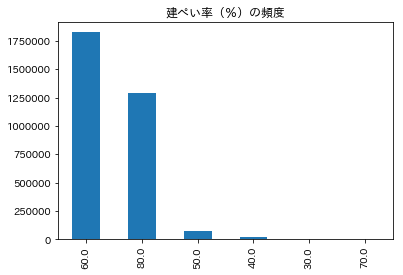

In [453]:
counts = data['建ぺい率（％）'].value_counts()
counts.plot.bar(title='建ぺい率（％）の頻度')

In [506]:
#欠損値に最頻値を代入
data['建ぺい率（％）'][data['建ぺい率（％）'].isnull() == True] = data['建ぺい率（％）'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [362]:
data['建ぺい率（％）'] = data['建ぺい率（％）'].astype(int)

## 面積

In [486]:
train.groupby('面積（㎡）').mean()['取引価格（総額）_log'].sort_values(ascending=False)

面積（㎡）
490     9.278754
1500    9.210720
980     9.113943
1300    9.069593
520     8.928666
          ...   
10      6.692248
15      6.650515
10      6.586515
610     6.000000
610     6.000000
Name: 取引価格（総額）_log, Length: 211, dtype: float64

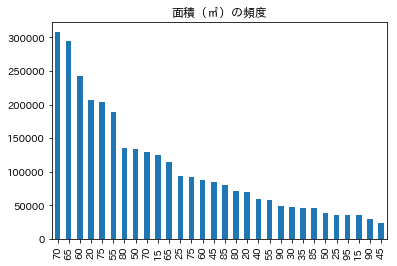

In [487]:
counts = data['面積（㎡）'].value_counts().head(30)
counts.plot.bar(title='面積（㎡）の頻度')

In [489]:
train['面積（㎡）'][train['面積（㎡）'] == 1500].value_counts()

1500    10
Name: 面積（㎡）, dtype: int64

In [507]:
data['面積（㎡）'][data['面積（㎡）'] == '2000㎡以上'] = 2000
data['面積（㎡）'] = data['面積（㎡）'].astype(int)

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [364]:
data[['取引価格（総額）_log', '容積率（％）', '建ぺい率（％）', '建築年', '築年数', '最寄駅：距離（分）', '面積（㎡）']].describe()

,取引価格（総額）_log,容積率（％）,建ぺい率（％）,建築年,築年数,最寄駅：距離（分）,面積（㎡）
count,3.313995e+06,3.337199e+06,3.337199e+06,3.337199e+06,3.337199e+06,3.337199e+06,3.337199e+06
mean,7.220486e+00,2.984667e+02,6.736720e+01,1.993249e+03,2.007434e+01,1.065032e+01,5.859926e+01
std,3.543172e-01,1.468101e+02,1.031918e+01,1.582339e+01,1.611598e+01,9.596817e+00,2.674445e+01
min,2.653213e+00,5.000000e+01,3.000000e+01,1.930000e+03,-2.000000e+00,0.000000e+00,1.000000e+01
25%,7.041393e+00,2.000000e+02,6.000000e+01,1.986000e+03,9.000000e+00,5.000000e+00,4.500000e+01
50%,7.278754e+00,2.000000e+02,6.000000e+01,1.996000e+03,1.700000e+01,8.000000e+00,6.500000e+01
75%,7.462398e+00,4.000000e+02,8.000000e+01,2.004000e+03,2.700000e+01,1.400000e+01,7.500000e+01
max,9.934498e+00,1.300000e+03,8.000000e+01,2.021000e+03,9.000000e+01,1.200000e+02,2.000000e+03


In [365]:
train = data[data['Train_flg'] == True]
train[['取引価格（総額）_log', '容積率（％）', '建ぺい率（％）', '建築年', '築年数', '最寄駅：距離（分）', '面積（㎡）']].corr()

,取引価格（総額）_log,容積率（％）,建ぺい率（％）,建築年,築年数,最寄駅：距離（分）,面積（㎡）
取引価格（総額）_log,1.000000,0.111097,0.027148,0.401497,-0.372250,-0.214330,0.379333
容積率（％）,0.111097,1.000000,0.772682,0.129540,-0.118249,-0.330345,-0.279969
建ぺい率（％）,0.027148,0.772682,1.000000,0.113946,-0.101636,-0.309812,-0.252162
建築年,0.401497,0.129540,0.113946,1.000000,-0.968086,-0.102886,0.035644
築年数,-0.372250,-0.118249,-0.101636,-0.968086,1.000000,0.100503,-0.038044
最寄駅：距離（分）,-0.214330,-0.330345,-0.309812,-0.102886,0.100503,1.000000,0.156588
面積（㎡）,0.379333,-0.279969,-0.252162,0.035644,-0.038044,0.156588,1.000000


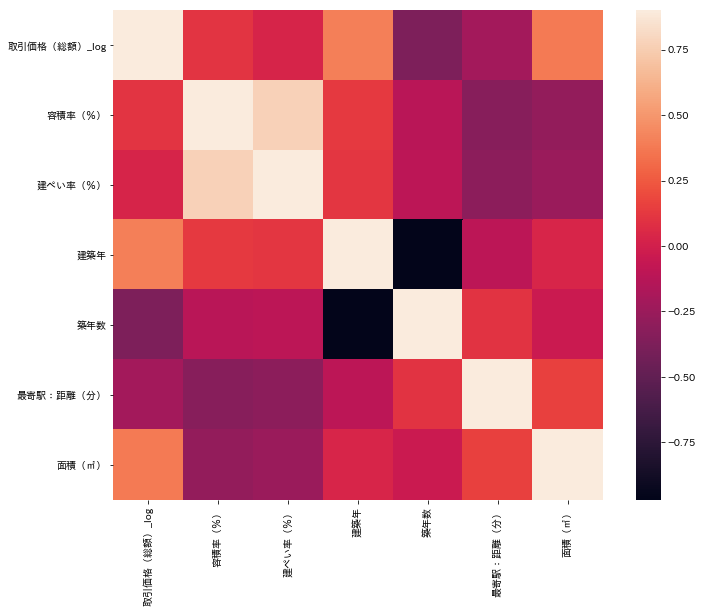

In [366]:
corrmat = train[['取引価格（総額）_log', '容積率（％）', '建ぺい率（％）', '建築年', '築年数', '最寄駅：距離（分）', '面積（㎡）']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [508]:
#特徴量を選択
# data = data[['ID', '最寄駅：距離（分）', '面積（㎡）', '取引年月', '建築年', '築年数', '東京23区', '港区住み', \
#              '容積率（％）', '都市計画', '建物の構造','間取り','Train_flg','取引価格（総額）_log']]


data = data[['ID','市区町村コード','地区名','最寄駅：距離（分）','最寄駅：名称','面積（㎡）','取引年月','建築年','築年数', \
             '改装', '都市計画', '建物の構造', '間取り', 'Train_flg', '取引価格（総額）_log']] 


In [509]:
data.head()

,ID,市区町村コード,地区名,最寄駅：距離（分）,最寄駅：名称,面積（㎡）,取引年月,建築年,築年数,改装,都市計画,建物の構造,間取り,Train_flg,取引価格（総額）_log
0,40133875,40131,331,6,160,50,20060930,1991,15,0,NaN,ＲＣ,２ＬＤＫ,True,6.740363
1,40054793,40135,9144,25,1310,50,20190331,1983,36,1,準住居地域,ＲＣ,３ＤＫ,True,6.977724
2,40058576,40134,11250,30,3711,70,20121231,2001,11,1,第２種住居地域,ＲＣ,３ＬＤＫ,True,7.255273
3,40014894,40131,2882,21,2258,70,20110630,1989,22,0,工業地域,ＲＣ,２ＬＤＫ,True,6.740363
4,40012487,40133,10865,13,3398,65,20100930,2000,10,0,第１種住居地域,ＳＲＣ,３ＬＤＫ,True,7.431364


## カテゴリーデータ

## 間取り

In [468]:
pd.set_option('display.max_rows', 63)
train['間取り'].value_counts()

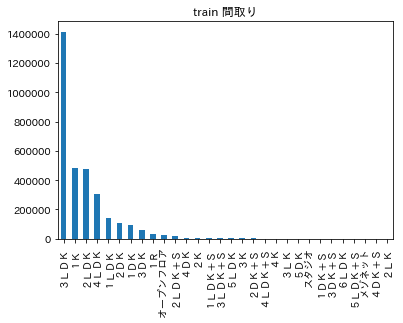

In [461]:
counts = train['間取り'].value_counts().head(30)
counts.plot.bar(title='train 間取り')

In [190]:
test['間取り'].value_counts()

３ＬＤＫ       9083
１Ｋ         4106
２ＬＤＫ       3617
４ＬＤＫ       1760
１ＬＤＫ       1228
２ＤＫ         691
１ＤＫ         634
３ＤＫ         281
１Ｒ          188
オープンフロア     127
２ＬＤＫ＋Ｓ      123
４ＤＫ          39
１ＬＤＫ＋Ｓ       37
３ＬＤＫ＋Ｓ       29
２Ｋ           29
５ＬＤＫ         22
３Ｋ           12
２ＤＫ＋Ｓ        10
５ＬＤＫ＋Ｓ        5
３ＬＫ           2
メゾネット         2
３ＤＫ＋Ｓ         2
５ＤＫ           2
４Ｋ            1
１ＤＫ＋Ｓ         1
１Ｌ            1
スタジオ          1
１Ｋ＋Ｓ          1
６ＬＤＫ          1
Name: 間取り, dtype: int64

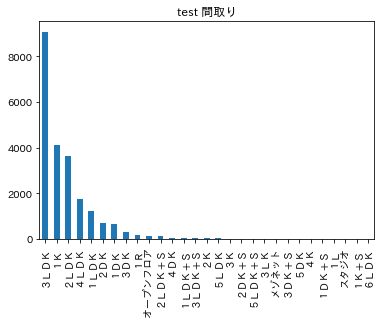

In [462]:
counts = test['間取り'].value_counts().head(30)
counts.plot.bar(title='test 間取り')

In [469]:
data['間取り'].value_counts()

In [470]:
data['間取り'].unique()

In [195]:
data['間取り'][data['間取り'].isnull() == True].count

<bound method Series.count of 8          NaN
14         NaN
42         NaN
55         NaN
99         NaN
          ... 
3313909    NaN
3313921    NaN
3313965    NaN
3313973    NaN
3313977    NaN
Name: 間取り, Length: 114770, dtype: object>

In [510]:
#欠損値に最頻値を代入
data['間取り'][data['間取り'].isnull() == True] = data['間取り'].mode()[0]

In [511]:

le = LabelEncoder()
encoded = le.fit_transform(data['間取り'].values)
decoded = le.inverse_transform(encoded)
data['間取り'] = encoded

## 用途

In [434]:
train.groupby('用途').mean()['取引価格（総額）_log'].sort_values(ascending=False)

用途
店舗、その他           8.278151
住宅、倉庫            7.740363
事務所、倉庫           7.565167
住宅、駐車場           7.548116
作業場              7.516712
住宅、事務所、駐車場、店舗    7.505150
事務所、店舗           7.245949
住宅、事務所           7.239629
工場               7.233756
住宅               7.218959
倉庫、店舗            7.216245
住宅、その他           7.189250
店舗               7.148106
住宅、店舗            6.985311
事務所              6.983416
倉庫、駐車場           6.942198
事務所、駐車場          6.939519
住宅、店舗、その他        6.903090
駐車場、店舗           6.840892
その他              6.826670
倉庫               6.646319
駐車場              6.634583
Name: 取引価格（総額）_log, dtype: float64

In [464]:
train['用途'].value_counts()

住宅               3006090
事務所                17915
店舗                 14530
その他                 3965
駐車場                  495
事務所、店舗               320
倉庫                   285
住宅、店舗                270
住宅、事務所               170
住宅、その他                80
工場                    35
住宅、駐車場                30
倉庫、店舗                 20
倉庫、駐車場                15
店舗、その他                10
作業場                   10
事務所、倉庫                10
駐車場、店舗                10
住宅、事務所、駐車場、店舗          5
住宅、倉庫                  5
住宅、店舗、その他              5
事務所、駐車場                5
Name: 用途, dtype: int64

In [463]:
test['用途'].value_counts()

住宅        16314
事務所          69
店舗           51
その他          18
駐車場           5
住宅、店舗         2
倉庫            2
事務所、店舗        2
作業場           1
住宅、その他        1
住宅、駐車場        1
Name: 用途, dtype: int64

In [435]:
data['用途'].value_counts()

住宅               3022404
事務所                17984
店舗                 14581
その他                 3983
駐車場                  500
事務所、店舗               322
倉庫                   287
住宅、店舗                272
住宅、事務所               170
住宅、その他                81
工場                    35
住宅、駐車場                31
倉庫、店舗                 20
倉庫、駐車場                15
作業場                   11
店舗、その他                10
事務所、倉庫                10
駐車場、店舗                10
住宅、事務所、駐車場、店舗          5
住宅、倉庫                  5
住宅、店舗、その他              5
事務所、駐車場                5
Name: 用途, dtype: int64

In [513]:
#欠損値に最頻値を代入
#data['用途'][data['用途'].isnull() == True] = data['用途'].mode()[0]

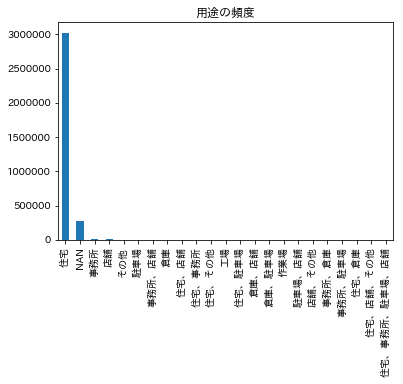

In [483]:
counts = data['用途'].value_counts()
counts.plot.bar(title='用途の頻度')

In [372]:
# data_dummies = data[['用途']]
# data_dummies = pd.get_dummies(data_dummies)

In [373]:
# data = pd.concat([data, data_dummies], axis=1)
# data = data.drop(['用途'], axis=1)

In [253]:
data['用途'][data['用途'].isnull() == True].count

<bound method Series.count of 1          NaN
12         NaN
15         NaN
22         NaN
23         NaN
          ... 
3337193    NaN
3337194    NaN
3337195    NaN
3337196    NaN
3337197    NaN
Name: 用途, Length: 276453, dtype: object>

In [514]:
data = data[['ID', '市区町村コード', '地区名','最寄駅：距離（分）', '最寄駅：名称', '面積（㎡）', '取引年月', '建築年', '築年数', \
             '改装', '都市計画', '建物の構造', '間取り', 'Train_flg', '取引価格（総額）_log']] 

## 都道府県名

In [476]:
train.groupby('都道府県名').mean()['取引価格（総額）_log'].sort_values(ascending=False)

都道府県名
東京都     7.394685
神奈川県    7.267041
沖縄県     7.204333
滋賀県     7.184368
埼玉県     7.177111
大阪府     7.176991
島根県     7.174041
京都府     7.173578
長崎県     7.169579
兵庫県     7.168601
千葉県     7.160767
愛知県     7.122665
広島県     7.114238
三重県     7.105168
鹿児島県    7.101735
山形県     7.094201
岐阜県     7.086693
長野県     7.081627
茨城県     7.076072
宮城県     7.062260
奈良県     7.061429
岡山県     7.061413
山口県     7.049023
富山県     7.046729
佐賀県     7.028398
和歌山県    7.027436
静岡県     7.026931
福岡県     7.015389
高知県     7.001362
熊本県     6.990520
福島県     6.988316
北海道     6.985382
宮崎県     6.981247
福井県     6.976732
愛媛県     6.971848
鳥取県     6.970546
青森県     6.960592
栃木県     6.952965
秋田県     6.951336
徳島県     6.945395
石川県     6.944744
岩手県     6.935738
群馬県     6.927526
新潟県     6.921301
大分県     6.919833
香川県     6.918079
山梨県     6.855189
Name: 取引価格（総額）_log, dtype: float64

In [ ]:
train['都道府県名'].value_counts()

In [20]:
train.groupby('市区町村コード').mean()['取引価格（総額）_log'].sort_values(ascending=False)

市区町村コード
13103    7.609970
12227    7.562012
14118    7.529216
13203    7.504759
13102    7.496757
           ...   
20217    6.232271
15108    6.113943
14401    6.089018
22429    6.039591
29441    4.849485
Name: 取引価格（総額）_log, Length: 618, dtype: float64

## 都市計画

In [414]:
train.groupby('都市計画').mean()['取引価格（総額）_log'].sort_values(ascending=False)

都市計画
工業専用地域                    7.470382
第２種低層住居専用地域               7.363423
第１種低層住居専用地域               7.319188
準工業地域                     7.280125
第２種住居地域                   7.265962
工業地域                      7.259972
商業地域                      7.240130
準住居地域                     7.235998
近隣商業地域                    7.228263
準都市計画区域                   7.214626
第２種中高層住居専用地域              7.189163
第１種中高層住居専用地域              7.178279
第１種住居地域                   7.173307
市街化区域及び市街化調整区域外の都市計画区域    6.888981
市街化調整区域                   6.853498
都市計画区域外                   6.090738
Name: 取引価格（総額）_log, dtype: float64

In [39]:
test['都市計画'].value_counts()

商業地域                      6857
第１種住居地域                   3489
第１種中高層住居専用地域              3428
準工業地域                     2778
近隣商業地域                    2460
第２種住居地域                   1073
第２種中高層住居専用地域               954
第１種低層住居専用地域                661
工業地域                       582
準住居地域                      419
市街化調整区域                    134
第２種低層住居専用地域                 31
都市計画区域外                     10
工業専用地域                       7
市街化区域及び市街化調整区域外の都市計画区域       5
Name: 都市計画, dtype: int64

In [438]:
train.groupby('都市計画').mean()['取引価格（総額）_log'].sort_values(ascending=False)

都市計画
工業専用地域                    7.470382
第２種低層住居専用地域               7.363423
第１種低層住居専用地域               7.319188
準工業地域                     7.280125
第２種住居地域                   7.265962
工業地域                      7.259972
商業地域                      7.240130
準住居地域                     7.235998
近隣商業地域                    7.228263
準都市計画区域                   7.214626
第２種中高層住居専用地域              7.189163
第１種中高層住居専用地域              7.178279
第１種住居地域                   7.173307
市街化区域及び市街化調整区域外の都市計画区域    6.888981
市街化調整区域                   6.853498
都市計画区域外                   6.090738
Name: 取引価格（総額）_log, dtype: float64

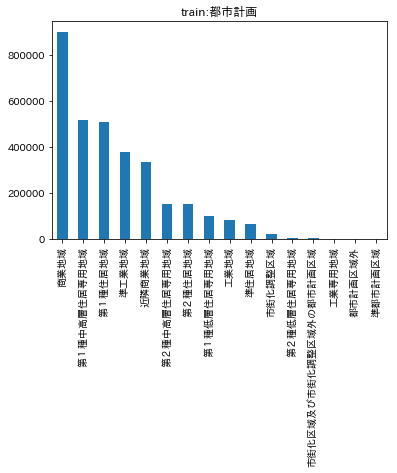

In [346]:
counts = train['都市計画'].value_counts()
counts
counts.plot.bar(title='train:都市計画')

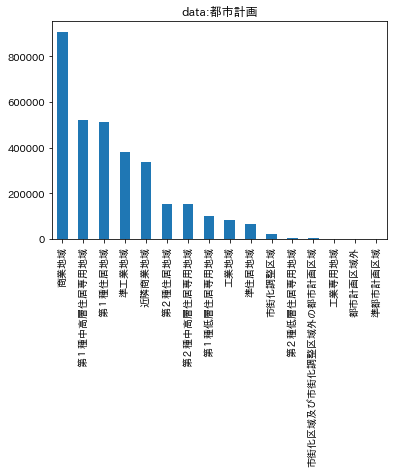

In [528]:
counts = data['都市計画'].value_counts()
counts
counts.plot.bar(title='data:都市計画')

In [114]:
train['都市計画'].value_counts()

商業地域                      900675
第１種中高層住居専用地域              516465
第１種住居地域                   506585
準工業地域                     377960
近隣商業地域                    333330
第２種中高層住居専用地域              152600
第２種住居地域                   152570
第１種低層住居専用地域               100805
工業地域                       82890
準住居地域                      65875
市街化調整区域                    20865
第２種低層住居専用地域                 4530
市街化区域及び市街化調整区域外の都市計画区域      1565
工業専用地域                      1150
都市計画区域外                     1110
準都市計画区域                       35
Name: 都市計画, dtype: int64

In [113]:
test['都市計画'].value_counts()

商業地域                      6857
第１種住居地域                   3489
第１種中高層住居専用地域              3428
準工業地域                     2778
近隣商業地域                    2460
第２種住居地域                   1073
第２種中高層住居専用地域               954
第１種低層住居専用地域                661
工業地域                       582
準住居地域                      419
市街化調整区域                    134
第２種低層住居専用地域                 31
都市計画区域外                     10
工業専用地域                       7
市街化区域及び市街化調整区域外の都市計画区域       5
Name: 都市計画, dtype: int64

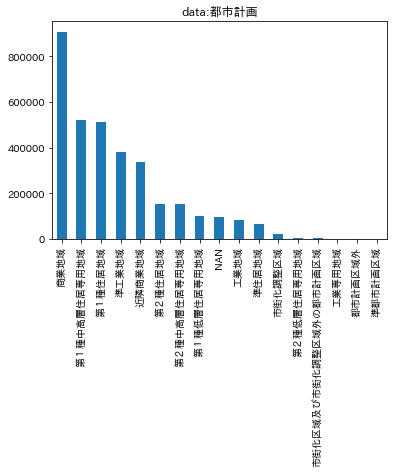

In [530]:
counts = data['都市計画'].value_counts()
counts
counts.plot.bar(title='data:都市計画')

In [515]:
#欠損値に最頻値を代入
data['都市計画'][data['都市計画'].isnull() == True] = data['都市計画'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [516]:
le = LabelEncoder()
encoded = le.fit_transform(data['都市計画'].values)
decoded = le.inverse_transform(encoded)
data['都市計画'] = encoded

In [138]:
# data_dummies = data[['都市計画']]
# data_dummies = pd.get_dummies(data_dummies)

In [139]:
# data = pd.concat([data, data_dummies], axis=1)
# data = data.drop(['都市計画'], axis=1)

In [140]:
#data = data.drop(['都市計画_市街化調整区域', '都市計画_工業地域','都市計画_第２種低層住居専用地域',\
#                  '都市計画_都市計画区域外', '都市計画_工業専用地域', '都市計画_市街化区域及び市街化調整区域外の都市計画区域'], axis=1)

#'都市計画_準住居地域',

## 建物の構造

In [413]:
train.groupby('建物の構造').mean()['取引価格（総額）_log'].sort_values(ascending=False)

建物の構造
ＲＣ、木造         7.778151
ＲＣ、鉄骨造        7.468978
ＲＣ、ブロック造      7.462398
ＳＲＣ、ＲＣ、鉄骨造    7.397940
軽量鉄骨造         7.281471
ＲＣ            7.245342
ＳＲＣ、鉄骨造       7.202268
ＳＲＣ、ＲＣ        7.177303
ＳＲＣ           7.169838
木造            7.076032
鉄骨造           6.976532
ブロック造         6.951073
Name: 取引価格（総額）_log, dtype: float64

In [54]:
train['建物の構造'].value_counts()

ＲＣ            2240465
ＳＲＣ            966905
鉄骨造             22085
ＳＲＣ、ＲＣ           3535
ＲＣ、鉄骨造           1645
ＳＲＣ、鉄骨造           740
木造                425
ブロック造             110
軽量鉄骨造              90
ＳＲＣ、ＲＣ、鉄骨造         10
ＲＣ、ブロック造            5
ＲＣ、木造               5
Name: 建物の構造, dtype: int64

In [202]:
test['建物の構造'].value_counts()

ＲＣ        15573
ＳＲＣ        6050
鉄骨造         117
ＳＲＣ、ＲＣ       30
ＲＣ、鉄骨造        9
軽量鉄骨造         1
Name: 建物の構造, dtype: int64

In [223]:
data['建物の構造'].value_counts()

ＲＣ            2256038
ＳＲＣ            972955
鉄骨造             22202
ＳＲＣ、ＲＣ           3565
ＲＣ、鉄骨造           1654
ＳＲＣ、鉄骨造           740
木造                425
ブロック造             110
軽量鉄骨造              91
ＳＲＣ、ＲＣ、鉄骨造         10
ＲＣ、木造               5
ＲＣ、ブロック造            5
Name: 建物の構造, dtype: int64

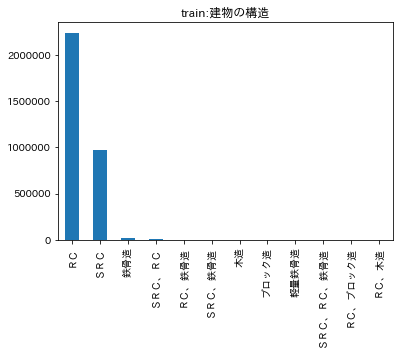

In [534]:
counts = train['建物の構造'].value_counts()
counts
counts.plot.bar(title='train:建物の構造')

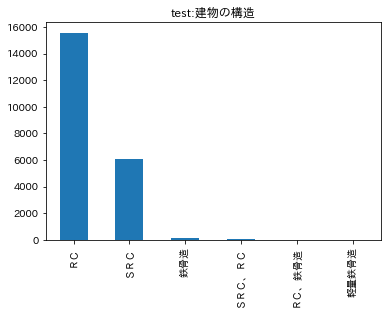

In [535]:
counts = test['建物の構造'].value_counts()
counts
counts.plot.bar(title='test:建物の構造')

In [517]:
data['建物の構造'][data['建物の構造'].isnull() == True] = data['建物の構造'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [518]:
data_dummies = data['建物の構造']
data_dummies = pd.get_dummies(data_dummies)

In [519]:
data = pd.concat([data, data_dummies], axis=1)
data = data.drop(['建物の構造'], axis=1)

In [520]:
#少ないものは、削除　
data = data.drop(['鉄骨造', 'ＳＲＣ、ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ、鉄骨造', '木造', 'ブロック造', '軽量鉄骨造', 'ＳＲＣ、ＲＣ、鉄骨造',\
          'ＲＣ、ブロック造', 'ＲＣ、木造'], axis=1)

In [563]:
data.head()

,ID,市区町村コード,地区名,最寄駅：距離（分）,最寄駅：名称,面積（㎡）,取引年月,築年数,改装,間取り,Train_flg,取引価格（総額）_log,ＲＣ,ＳＲＣ
0,40133875,40131,331,6,160,50,20060930,15,0,25,True,6.740363,1,0
1,40054793,40135,9144,25,1310,50,20190331,36,1,31,True,6.977724,1,0
2,40058576,40134,11250,30,3711,70,20121231,11,1,37,True,7.255273,1,0
3,40014894,40131,2882,21,2258,70,20110630,22,0,25,True,6.740363,1,0
4,40012487,40133,10865,13,3398,65,20100930,10,0,37,True,7.431364,0,1


In [584]:
data.columns

Index(['ID', '市区町村コード', '地区名', '最寄駅：距離（分）', '最寄駅：名称', '面積（㎡）', '取引年月', '築年数',
       '改装', '間取り', 'Train_flg', '取引価格（総額）_log', 'ＲＣ', 'ＳＲＣ'],
      dtype='object')

## モデリングの為にデータを分割

In [569]:
##なぜかtrainの件数が増え、testの件数減る
train = data[data['Train_flg'] == True]
test = data[data['Train_flg'] == False]

In [697]:
train.shape

(3313995, 26)

In [522]:
test.shape

(23204, 16)

In [570]:
#IDは提出時に使うので変数に入れておく
test_id = test[['ID']]

In [571]:
train = train.drop(['ID'], axis=1)
test = test.drop(['ID'], axis=1)

In [572]:
train = train.drop(['Train_flg'], axis=1)
test = test.drop(['Train_flg'], axis=1)

In [573]:
## 目的変数の列を除外
test = test.drop('取引価格（総額）_log', axis=1)

In [574]:
y = train['取引価格（総額）_log']

In [575]:
train = train.drop('取引価格（総額）_log', axis=1)

In [576]:
X_train, y_train = train, y
X_test = test

## ランダムフォレスト

In [244]:
#クロスバリデーション
#ランダムフォレスト

# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# kf = KFold(n_splits=4, shuffle=True, random_state=71)

# tr_idx, va_idx = list(kf.split(X_train))[0]

# tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
# tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]

# rf = RandomForestRegressor(max_depth=5, random_state=42)

# rf.fit(tr_x, tr_y)

# va_pred = rf.predict(va_x)
# score = mean_absolute_error(va_y, va_pred)

# y_pred = rf.predict(X_test)

## XGBoost

In [ ]:
# #時系列でバリデーション
# from sklearn.model_selection import KFold
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error


# va_period_list = [1, 2, 3]
# for va_period in va_period_list:
#     is_tr = X_train['取引年月'] < va_period
#     is_va = X_train['取引年月'] == va_period
#     tr_x, va_x = X_train[is_tr], X_train[is_va]
#     tr_y, va_y = y_train[is_tr], y_train[is_va]
     

In [577]:
#n_splits=5が最適

from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=71)

tr_idx, va_idx = list(kf.split(X_train))[0]

tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]

dtrain = xgb.DMatrix(tr_x, label=tr_y)
dvalid = xgb.DMatrix(va_x, label=va_y)
X_test = xgb.DMatrix(X_test)

params = {'objective':'reg:linear','max_depth':9,'random_state':71}
num_round = 50
#'objective':'reg:linear', 
#'eta':0.1, 'min_child_weight':1, 'gamma':1

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round, evals=watchlist)


va_pred = model.predict(dvalid)
score = mean_absolute_error(va_y, va_pred)

y_pred = model.predict(X_test)


[21:37:50] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:4.71267	eval-rmse:4.71361
[1]	train-rmse:3.30176	eval-rmse:3.30220
[2]	train-rmse:2.31487	eval-rmse:2.31519
[3]	train-rmse:1.62515	eval-rmse:1.62537
[4]	train-rmse:1.14387	eval-rmse:1.14404
[5]	train-rmse:0.80917	eval-rmse:0.80932
[6]	train-rmse:0.57803	eval-rmse:0.57817
[7]	train-rmse:0.41986	eval-rmse:0.42000
[8]	train-rmse:0.31424	eval-rmse:0.31448
[9]	train-rmse:0.24551	eval-rmse:0.24587
[10]	train-rmse:0.20336	eval-rmse:0.20381
[11]	train-rmse:0.17796	eval-rmse:0.17854
[12]	train-rmse:0.16388	eval-rmse:0.16457
[13]	train-rmse:0.15521	eval-rmse:0.15604
[14]	train-rmse:0.15065	eval-rmse:0.15157
[15]	train-rmse:0.14721	eval-rmse:0.14821
[16]	train-rmse:0.14529	eval-rmse:0.14636
[17]	train-rmse:0.14383	eval-rmse:0.14502
[18]	train-rmse:0.14260	eval-rmse:0.14384
[19]	train-rmse:0.14192	eval-rmse:0.14324
[20]	train-rmse:0.140

In [134]:
print(va_pred)

[6.859033  6.8887196 7.137066  ... 7.3188863 6.8696613 7.133093 ]


In [578]:
print(score)

0.0825173589096026


In [335]:
print(y_pred)

[6.96128   6.96128   7.1366124 ... 6.6858983 6.8744946 7.301374 ]


In [579]:
y_pred_sub = y_pred
test_id_sub = test_id

In [580]:
 y_pred_sub = pd.DataFrame({
         "取引価格（総額）_log": y_pred_sub
     })

In [581]:
test_id_sub = test_id_sub.reset_index(drop=True)

In [582]:
test_id_sub['取引価格（総額）_log'] = y_pred_sub['取引価格（総額）_log']

In [583]:
test_id_sub.to_csv("submission_1.csv", index = False)

In [245]:
submission_1 = pd.read_csv('submission_1.csv')
submission_1

,ID,取引価格（総額）_log
0,1000114,6.916909
1,1000116,6.916909
2,1000117,7.084682
3,1000118,7.416287
4,1000119,6.480031
...,...,...
23199,47012519,7.640749
23200,47014760,7.149372
23201,47014956,6.867281
23202,47015505,6.968362


In [786]:
submission_1.isnull().any()

ID              False
取引価格（総額）_log    False
dtype: bool

In [787]:
submission_1.shape

(23204, 2)